In [69]:
# import dependencies 
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

from sqlalchemy import create_engine, inspect

# Imports the methods needed to abstract classes into tables, declare Base variable
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 
from sqlalchemy import create_engine, inspect, func

# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

#import pandas and os
import pandas as pd 
import os 

import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#connect to sqlite database, create engine
engine = create_engine('sqlite:///../hawaii.sqlite', )

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'measurement_station_join', 'station']

In [6]:
# Create a session
session = Session(engine)


In [21]:
Measurement = Base.classes.measurement
Station= Base.classes.station
Measurement_Station_Join= Base.classes.measurement_station_join

In [22]:
# Get a list of column names and types for measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement_station_join')
for c in columns:
    print(c["name"])
# columns

id
station
date
prcp
tobs
name
latitude
longitude
elevation


In [103]:
#make a query for date and prcp values from measurement (may5,2017 to may 5,2016)
prcp_dates=session.query(Measurement_Station_Join.date,Measurement_Station_Join.prcp).\
        filter(Measurement_Station_Join.date <="2017/5/8").\
        filter(Measurement_Station_Join.date >="2016/5/8").\
        order_by(Measurement_Station_Join.date).all()


In [104]:
prcp_dates

[('2016/5/8', 0),
 ('2016/5/8', 0.8),
 ('2016/5/8', 0.75),
 ('2016/5/8', 0.38),
 ('2016/5/8', 0.1),
 ('2016/5/9', 0),
 ('2016/5/9', 0.1),
 ('2016/5/9', 0.02),
 ('2016/5/9', 0.13),
 ('2016/5/9', 0.02),
 ('2016/6/1', 0.06),
 ('2016/6/1', 0.89),
 ('2016/6/1', 0.22),
 ('2016/6/1', 0.38),
 ('2016/6/1', 1.39),
 ('2016/6/1', 1.4),
 ('2016/6/10', 0.05),
 ('2016/6/10', 0.06),
 ('2016/6/10', 0.13),
 ('2016/6/10', 0.23),
 ('2016/6/10', 0.62),
 ('2016/6/10', 1.4),
 ('2016/6/11', 0),
 ('2016/6/11', 0.02),
 ('2016/6/11', 0.01),
 ('2016/6/11', 0),
 ('2016/6/11', 0.13),
 ('2016/6/11', 0.65),
 ('2016/6/12', 0.01),
 ('2016/6/12', 0.04),
 ('2016/6/12', 0.26),
 ('2016/6/12', 0.12),
 ('2016/6/12', 0.28),
 ('2016/6/12', 0.55),
 ('2016/6/13', 0),
 ('2016/6/13', 0.08),
 ('2016/6/13', 0.01),
 ('2016/6/13', 0.1),
 ('2016/6/13', 0.02),
 ('2016/6/13', 0.08),
 ('2016/6/14', 0),
 ('2016/6/14', 0.06),
 ('2016/6/14', 0),
 ('2016/6/14', 0),
 ('2016/6/14', 0.2),
 ('2016/6/14', 0.19),
 ('2016/6/15', 0.01),
 ('2016/6/15'

In [105]:
#put all dates and prcp values into lists
dates=[]
prcp=[]
for i in prcp_dates:
    print(i)
    a,b=i
    print(a)
    dates.append(a)
    print(b)
    prcp.append(b)

('2016/5/8', 0)
2016/5/8
0
('2016/5/8', 0.8)
2016/5/8
0.8
('2016/5/8', 0.75)
2016/5/8
0.75
('2016/5/8', 0.38)
2016/5/8
0.38
('2016/5/8', 0.1)
2016/5/8
0.1
('2016/5/9', 0)
2016/5/9
0
('2016/5/9', 0.1)
2016/5/9
0.1
('2016/5/9', 0.02)
2016/5/9
0.02
('2016/5/9', 0.13)
2016/5/9
0.13
('2016/5/9', 0.02)
2016/5/9
0.02
('2016/6/1', 0.06)
2016/6/1
0.06
('2016/6/1', 0.89)
2016/6/1
0.89
('2016/6/1', 0.22)
2016/6/1
0.22
('2016/6/1', 0.38)
2016/6/1
0.38
('2016/6/1', 1.39)
2016/6/1
1.39
('2016/6/1', 1.4)
2016/6/1
1.4
('2016/6/10', 0.05)
2016/6/10
0.05
('2016/6/10', 0.06)
2016/6/10
0.06
('2016/6/10', 0.13)
2016/6/10
0.13
('2016/6/10', 0.23)
2016/6/10
0.23
('2016/6/10', 0.62)
2016/6/10
0.62
('2016/6/10', 1.4)
2016/6/10
1.4
('2016/6/11', 0)
2016/6/11
0
('2016/6/11', 0.02)
2016/6/11
0.02
('2016/6/11', 0.01)
2016/6/11
0.01
('2016/6/11', 0)
2016/6/11
0
('2016/6/11', 0.13)
2016/6/11
0.13
('2016/6/11', 0.65)
2016/6/11
0.65
('2016/6/12', 0.01)
2016/6/12
0.01
('2016/6/12', 0.04)
2016/6/12
0.04
('2016/6/12', 0.

('2016/9/3', 0.07)
2016/9/3
0.07
('2016/9/3', 0.08)
2016/9/3
0.08
('2016/9/3', 0.12)
2016/9/3
0.12
('2016/9/3', 1)
2016/9/3
1
('2016/9/30', 0)
2016/9/30
0
('2016/9/30', 0.31)
2016/9/30
0.31
('2016/9/30', 0.06)
2016/9/30
0.06
('2016/9/30', 0.15)
2016/9/30
0.15
('2016/9/30', 0.25)
2016/9/30
0.25
('2016/9/30', 0.38)
2016/9/30
0.38
('2016/9/4', 0.03)
2016/9/4
0.03
('2016/9/4', 0.03)
2016/9/4
0.03
('2016/9/4', 0.74)
2016/9/4
0.74
('2016/9/4', 0.14)
2016/9/4
0.14
('2016/9/4', 0.44)
2016/9/4
0.44
('2016/9/5', 0.11)
2016/9/5
0.11
('2016/9/5', 0.02)
2016/9/5
0.02
('2016/9/5', 0.03)
2016/9/5
0.03
('2016/9/5', 0.18)
2016/9/5
0.18
('2016/9/6', 0.05)
2016/9/6
0.05
('2016/9/6', 0.04)
2016/9/6
0.04
('2016/9/6', 0.03)
2016/9/6
0.03
('2016/9/6', 0.11)
2016/9/6
0.11
('2016/9/6', 1)
2016/9/6
1
('2016/9/7', 0.05)
2016/9/7
0.05
('2016/9/7', 0.1)
2016/9/7
0.1
('2016/9/7', 0.23)
2016/9/7
0.23
('2016/9/7', 0.11)
2016/9/7
0.11
('2016/9/7', 0.16)
2016/9/7
0.16
('2016/9/7', 1.35)
2016/9/7
1.35
('2016/9/8', 0)
20

0.14
('2017/3/3', 0.25)
2017/3/3
0.25
('2017/3/3', 0.27)
2017/3/3
0.27
('2017/3/3', 0.56)
2017/3/3
0.56
('2017/3/30', 0)
2017/3/30
0
('2017/3/30', 0.08)
2017/3/30
0.08
('2017/3/30', 0.03)
2017/3/30
0.03
('2017/3/30', 0)
2017/3/30
0
('2017/3/30', 0.04)
2017/3/30
0.04
('2017/3/31', 0)
2017/3/31
0
('2017/3/31', 0)
2017/3/31
0
('2017/3/31', 0)
2017/3/31
0
('2017/3/31', 0)
2017/3/31
0
('2017/3/31', 0)
2017/3/31
0
('2017/3/31', 0.01)
2017/3/31
0.01
('2017/3/4', 0)
2017/3/4
0
('2017/3/4', 0)
2017/3/4
0
('2017/3/4', 0)
2017/3/4
0
('2017/3/4', 0)
2017/3/4
0
('2017/3/4', 0)
2017/3/4
0
('2017/3/5', 0.35)
2017/3/5
0.35
('2017/3/5', 0.1)
2017/3/5
0.1
('2017/3/5', 0.41)
2017/3/5
0.41
('2017/3/5', 0.35)
2017/3/5
0.35
('2017/3/6', 0)
2017/3/6
0
('2017/3/6', 0.51)
2017/3/6
0.51
('2017/3/6', 0.03)
2017/3/6
0.03
('2017/3/6', 0)
2017/3/6
0
('2017/3/7', 0)
2017/3/7
0
('2017/3/7', 0)
2017/3/7
0
('2017/3/7', 0)
2017/3/7
0
('2017/3/7', 0)
2017/3/7
0
('2017/3/7', 0)
2017/3/7
0
('2017/3/8', 0)
2017/3/8
0
('2017

In [106]:
#make a data frame from lists 
Dates_Prcp_df=pd.DataFrame()
Dates_Prcp_df["Date"]=dates
Dates_Prcp_df["Prcp"]=prcp
Dates_Prcp_df=Dates_Prcp_df.set_index("Date")
Dates_Prcp_df=Dates_Prcp_df.groupby("Date").mean()
Dates_Prcp_df.head()

,Prcp
Date,
2016/5/8,0.406000
2016/5/9,0.054000
2016/6/1,0.723333
2016/6/10,0.415000
2016/6/11,0.135000


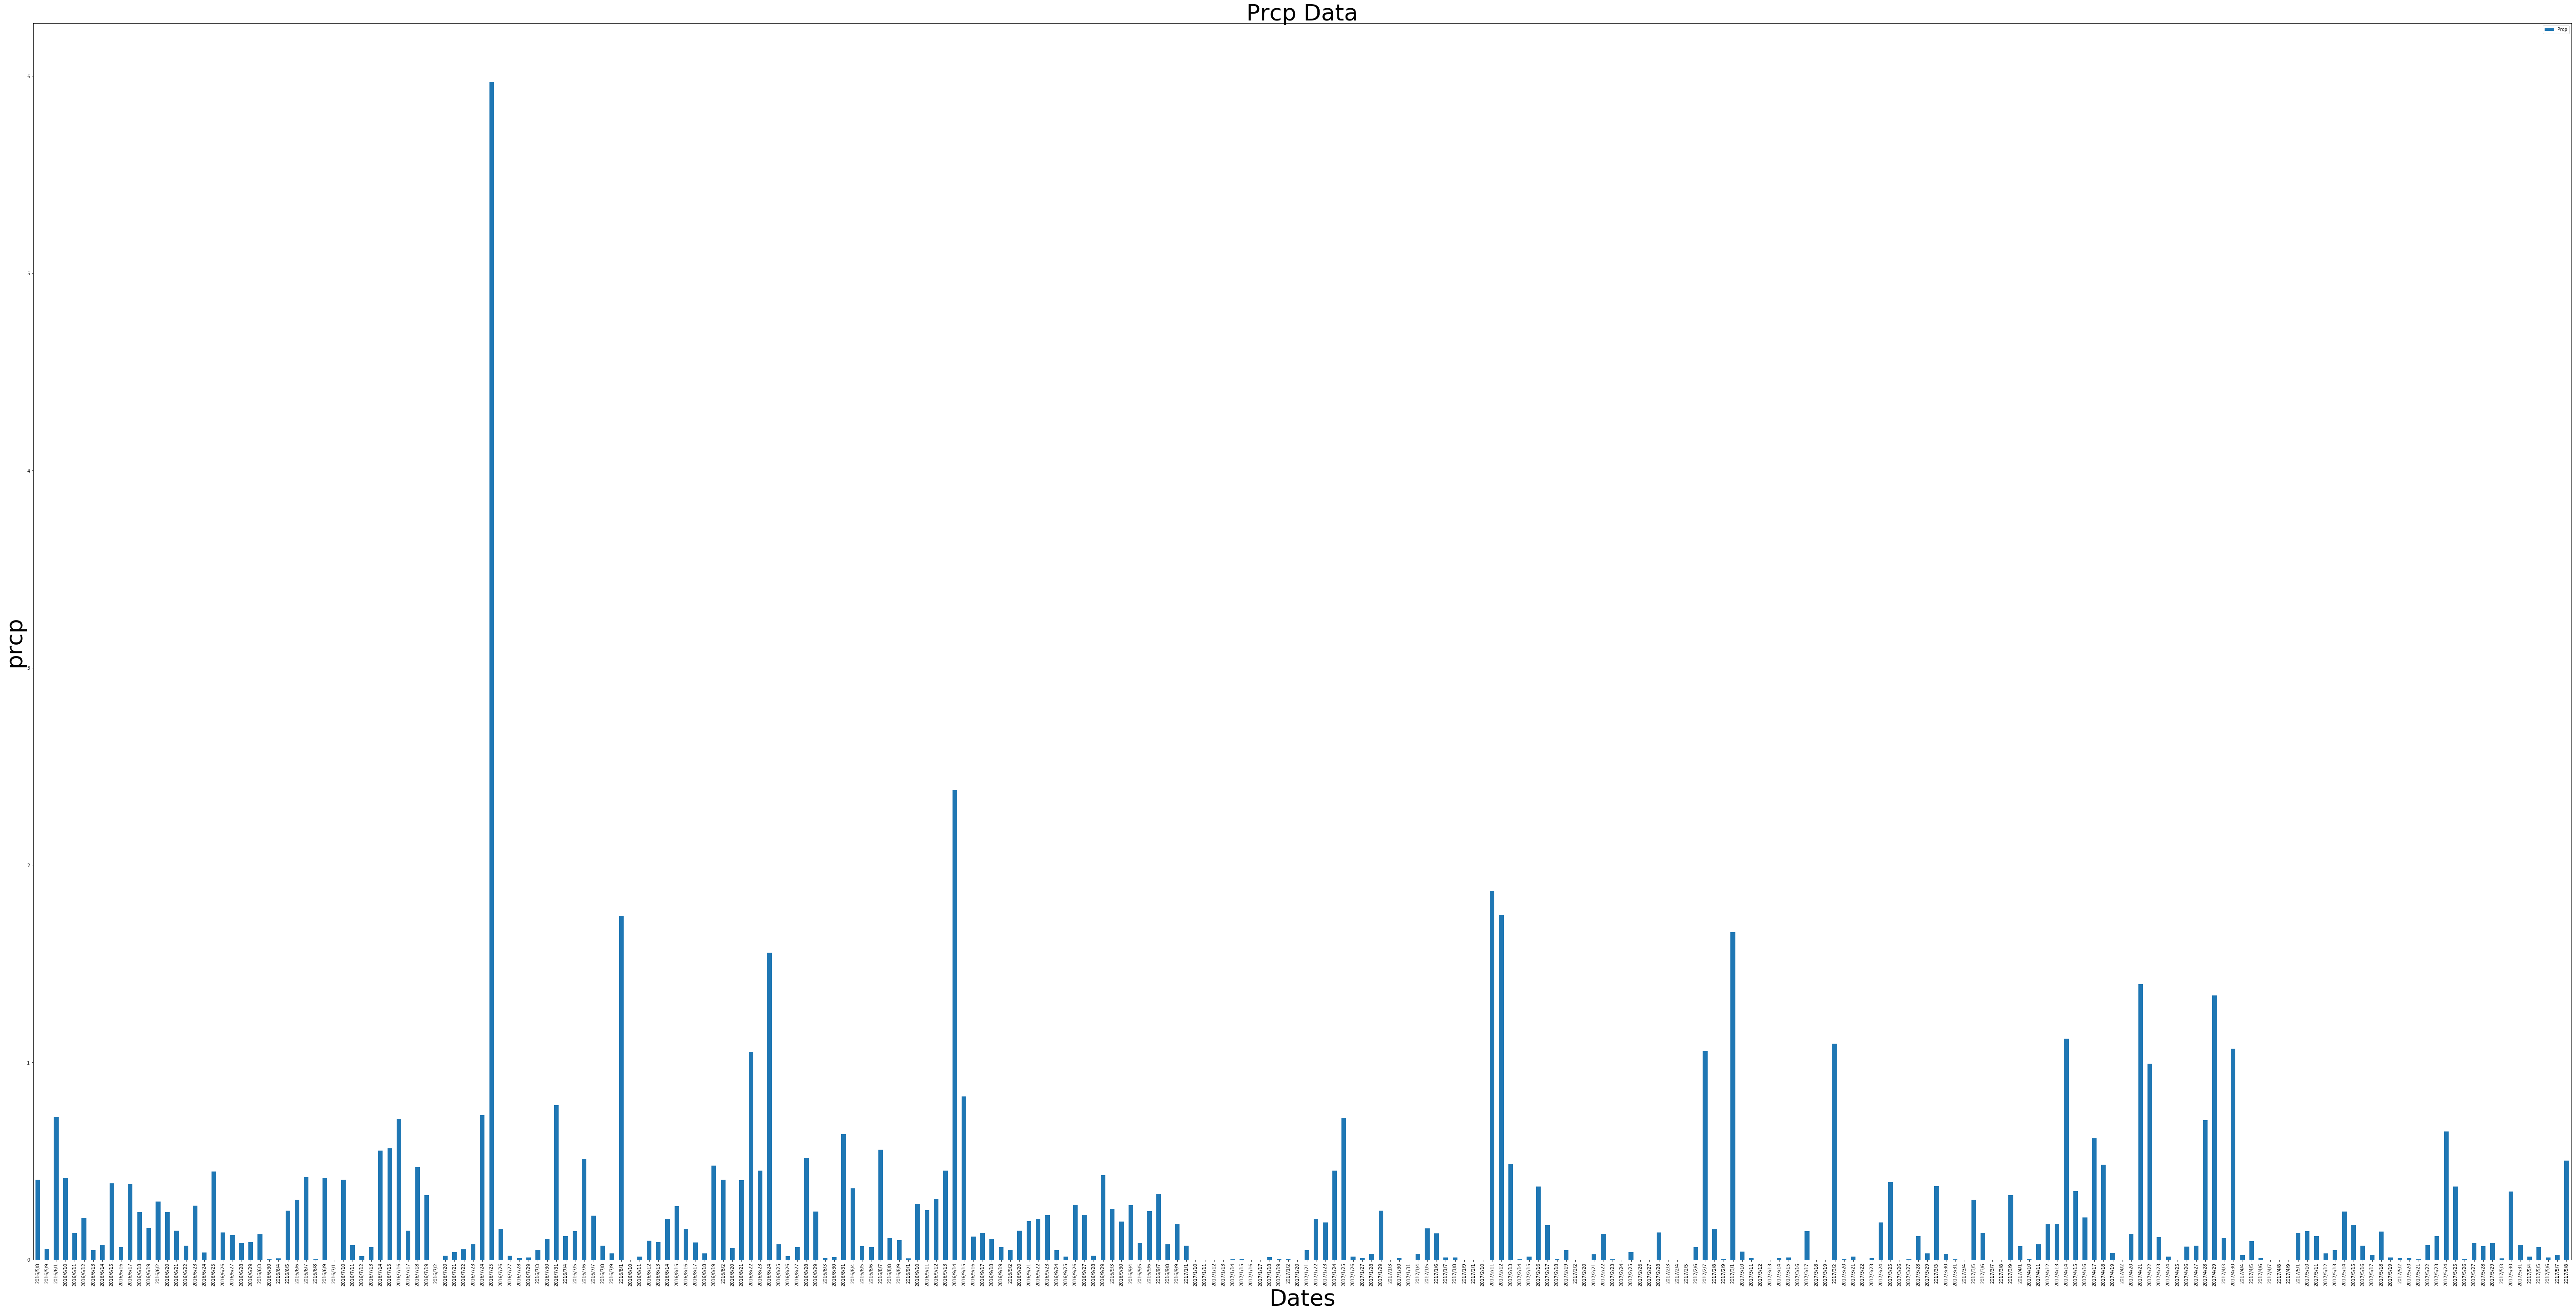

In [107]:
#plot the data
Dates_Prcp_df.plot(kind="bar",figsize=(100,50))
plt.title("Prcp Data", size=50)
plt.ylabel("prcp" ,size=50)
plt.xlabel("Dates", size=50)
plt.show()

In [344]:
#how many stations total
station_count_each=session.query(func.count(Measurement_Station_Join.station)).group_by((Measurement_Station_Join.station)).all()
len(station_count_each)#number of stations here 



9

In [193]:
#make a query for stations and most used stations
station_count=session.query(Measurement_Station_Join.station,func.count(Measurement_Station_Join.station)).\
                          group_by(Measurement_Station_Join.station).all()
station_count

[('USC00511918', 1932),
 ('USC00513117', 2696),
 ('USC00514830', 1937),
 ('USC00516128', 2484),
 ('USC00517948', 683),
 ('USC00518838', 342),
 ('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00519523', 2572)]

In [194]:
#turn station_count into dataframe and plot
station=[]
count=[]
for i in station_count:
    print(i)
    a,b=i
    station.append(a)
    count.append(b)
   
    



('USC00511918', 1932)
('USC00513117', 2696)
('USC00514830', 1937)
('USC00516128', 2484)
('USC00517948', 683)
('USC00518838', 342)
('USC00519281', 2772)
('USC00519397', 2685)
('USC00519523', 2572)


In [195]:
#put into data frame station and count
Station_Count_df=pd.DataFrame()
Station_Count_df["Station"]=station
Station_Count_df["Count"]=count
Station_Count_df.head()

,Station,Count
0,USC00511918,1932
1,USC00513117,2696
2,USC00514830,1937
3,USC00516128,2484
4,USC00517948,683


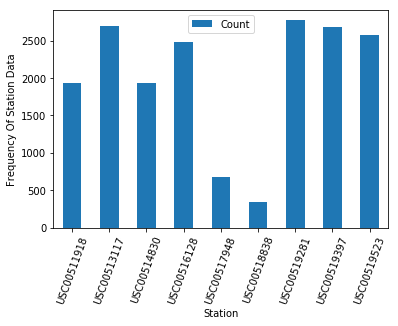

In [208]:
# plot station and counts(was not able to make histogrm had to create one from counts couldnt bin)
Station_Count_df.plot(x="Station",kind="bar", rot=70)
plt.ylabel("Frequency Of Station Data")
plt.show()

In [265]:
# write function for calc temps using #Y,#m,#d format 
def calc_temps(start_date,end_date):
    data=session.query(Measurement_Station_Join.date,(Measurement_Station_Join.tobs)).\
      filter(Measurement_Station_Join.date <= end_date).\
      filter(Measurement_Station_Join.date >= start_date).\
      order_by(Measurement_Station_Join.date).all()
    print (data)

                       

In [273]:
start_date= "2016/5/6"
end_date="2017/5/6"
#do the query 
  
    
def calc_temps(start_date,end_date):   
     data=session.query(Measurement_Station_Join.date,Measurement_Station_Join.tobs).\
               filter(Measurement_Station_Join.date>=start_date).\
               filter(Measurement_Station_Join.date<=end_date).\
               order_by(Measurement_Station_Join.date).all()

#get averages for all the data
     dates=[]
     temp=[]
     max_temp=0
     min_temp=0
     average_temp=0

     for i in data:
        a,b=i
        dates.append(a)
        temp.append(b)

     max_temp=max(temp)
     min_temp=min(temp)
     average_temp=(sum(temp)/len(temp))
    
     print(max_temp)
     print(min_temp)
     print(average_temp)

In [274]:
#test the function
calc_temps(start_date,end_date)


87
58
74.25490196078431


Text(0.5,1,'Trip Average Temp Data')

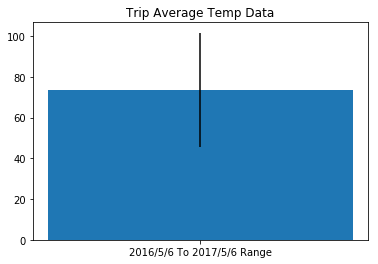

In [342]:
plt.bar(f'{start_date} To {end_date} Range',average_temp,align="center",yerr=(max_temp-min_temp))
plt.title("Trip Average Temp Data")

